In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('domain/phishing_site_urls.csv')
data.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


## Data Wrangling

In [3]:
# Dealing with null value

data.isna().sum(), data.shape

(URL      0
 Label    0
 dtype: int64,
 (549346, 2))

In [4]:
# Label Lookup

lbl_lookup = dict(zip(data["Label"].unique(), [0, 1]))
lbl_lookup

{'bad': 0, 'good': 1}

In [5]:
# Converting Categorical data in to numerical

data["Label"].replace(lbl_lookup, inplace=True)
data.head(1)

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,0


## Explanatory Data Analysis

In [6]:
# Value counts

data["Label"].value_counts()

1    392924
0    156422
Name: Label, dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

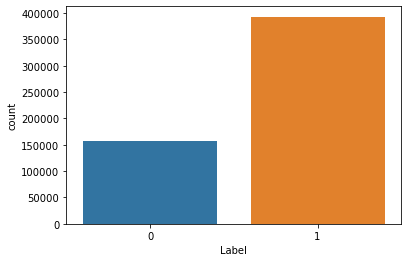

In [7]:
# Value count plot

sns.countplot(x='Label', data=data)

<AxesSubplot:xlabel='Label'>

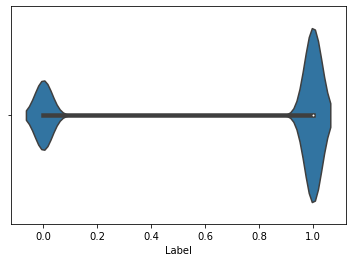

In [8]:
sns.violinplot(x='Label', data=data)

In [ ]:
sns.scatterplot(data=data, x=data['URL'], hue=data['Label'])
plt.show()

## Modeling

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
from sklearn.utils import shuffle

# Shuffling the dataset
data = shuffle(data, random_state=1)

X = data['URL']
y = data["Label"]

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, y_train.shape

((439476,), (439476,))

In [23]:
from sklearn.linear_model import SGDClassifier

In [22]:
def sgd():
    
    clf =  Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(max_iter=1000, tol=1e-3)),
               ]).fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    print(f'Training Score: {train_score}, Test Score: {test_score}')
    
    return {
        'model': clf,
        'y_pred': y_pred,
        'train_score': train_score,
        'test_score': test_score
    }
    
sgd()

Training Score: 0.9087595227043115, Test Score: 0.9075179757895695


{'model': Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                 ('clf', SGDClassifier())]),
 'y_pred': array([1, 1, 1, ..., 1, 1, 1], dtype=int64),
 'train_score': 0.9087595227043115,
 'test_score': 0.9075179757895695}

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
clf = sgd()
y_pred = clf['y_pred']
print(classification_report(y_test, y_pred))

Training Score: 0.9088755699969964, Test Score: 0.9077637207608993
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     31286
           1       0.89      0.99      0.94     78584

    accuracy                           0.91    109870
   macro avg       0.93      0.85      0.88    109870
weighted avg       0.91      0.91      0.90    109870



<AxesSubplot:>

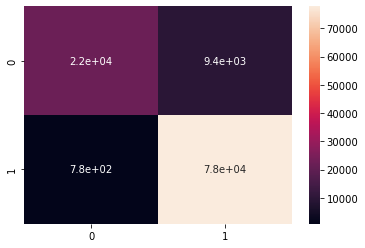

In [27]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)